<a href="https://colab.research.google.com/github/danielbauer1979/MSDIA_PredictiveModelingAndMachineLearning/blob/main/GB886_VIII_4_WineExample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting High Quality Wines

In this example, we consider a **classification problem** where we classify red wines into high-quality wines (1) and low-quality wines (0). The features originate from chemical decomposition of the wines and the quality rating comes from consumer groups.

## Business Setting

Here is an example of a hypothetical business setting where this predictive problem would be relevant:

"I work on a team for the Castco retail company. We offer wine to our customers, although our selection is relatively small in comparison to wine speciality shops. We do order and sell large quantities of most of our wines though. Therefore, it is important to our business that the wines we select for our offerings are high quality. In the past, we used user groups to assess quality, but scheduling user groups is costly and the timeline of our purchasing timeline often does not allow for setting up a representative grouo. My team has been tasked to use analytics to discern likely high-quality wines from our past experience based on chemical characteristics of the wines. It is is easier to obtain the chemical specifications from a lab, and our model will provide immediate predictions of whether a given wine is likely high-quality. This is important information (in addition to price and other attributes to our purchasers."

As an aside, this setting is informed by a story about the [wine purchaser of the retailer Costo](https://www.businessinsider.com/annette-alvarez-peters-powerful-wine-merchant-costco-employee-2012-4#:~:text=Her%20name%20is%20Annette%20Alvarez,dollars%20worth%20of%20wine%20annually.) :-). Apparently she is "the world's most powerful person in wine."

## Exploring the Data

We start by loading and exploring the data. The exporation is going to be key in informing our modeling process.

### Loading Data

Let's load relevant packages and the data:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!git clone https://github.com/danielbauer1979/MSDIA_PredictiveModelingAndMachineLearning.git

Cloning into 'MSDIA_PredictiveModelingAndMachineLearning'...
remote: Enumerating objects: 243, done.
remote: Counting objects: 100% (132/132), done.
remote: Compressing objects: 100% (117/117), done.
remote: Total 243 (delta 76), reused 15 (delta 15), pack-reused 111 (from 1)
Receiving objects: 100% (243/243), 18.59 MiB | 5.49 MiB/s, done.
Resolving deltas: 100% (119/119), done.
Updating files: 100% (52/52), done.


In [3]:
wine_dat = pd.read_csv('MSDIA_PredictiveModelingAndMachineLearning/GB886_VIII_4_winequality.csv')

In [4]:
wine_dat

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,0
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,0


So we see we have 11 features and quality, which is our target. It seeems that all our features are numerical, so we do not need to convert categorical features to dummy variables.

### Data Exploration

Let's start by looking at a *correlation plot* that gives correlations of all the features, inlcuding to quality which is our target:

<Axes: >

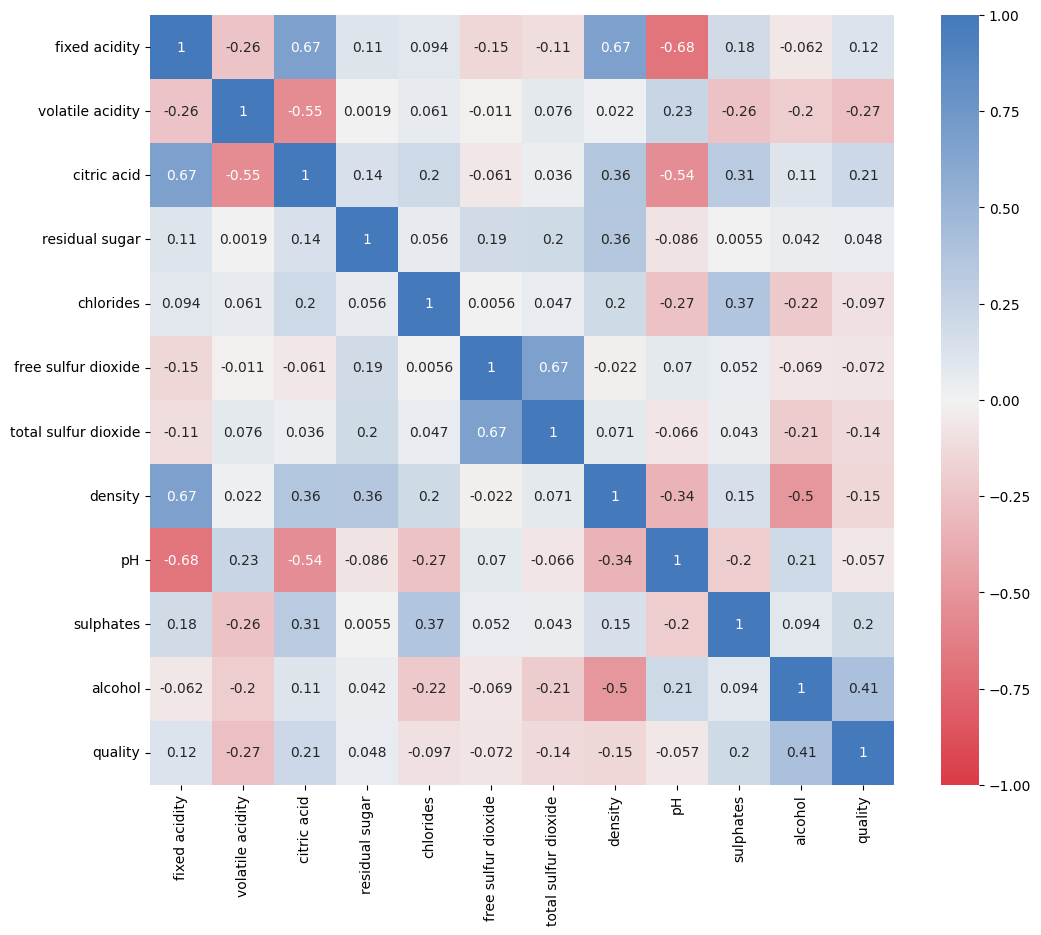

In [5]:
corr = wine_dat.corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr, cmap=sns.diverging_palette(10, 250, as_cmap=True), vmin=-1, vmax=1, annot=True)

So it appears that the correlations to quality are modest, with the exception of alcohol level---which is positively related to assessed quality.  There is some correlation among the features, yet none of them are in the 90% region, so that arguably very strong relationships won't be a porblem ("multicollinearity"). So, for now it does not seem that we need to drop any of the features.

Let's investigate the relationships of the features and quality in more detail. I am using plots that bib the features and then determine the average quality level ('sns.regplot'):

<ipython-input-6-b1a29ba2f64e>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sns.regplot(x=feature, y='quality', data=wine_dat, x_bins=10, scatter_kws={'s': wine_dat.groupby(pd.cut(wine_dat[feature], bins=10))['quality'].count()}, ax=axes[i])


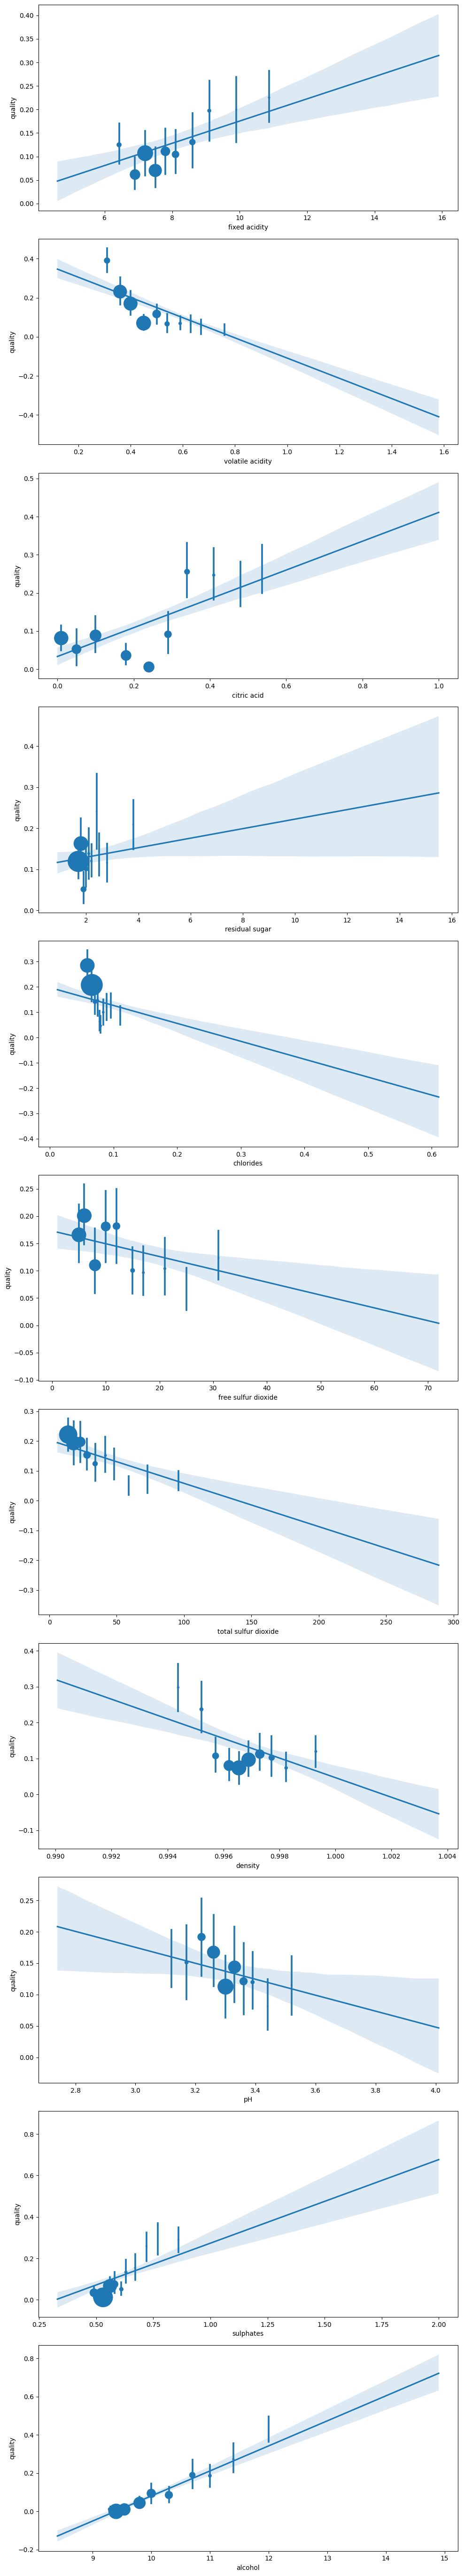

In [6]:
features = wine_dat.columns.values[:-1]
fig, axes = plt.subplots(len(features), 1, figsize=(10, 5*len(features)))
for i, feature in enumerate(features):
  sns.regplot(x=feature, y='quality', data=wine_dat, x_bins=10, scatter_kws={'s': wine_dat.groupby(pd.cut(wine_dat[feature], bins=10))['quality'].count()}, ax=axes[i])
plt.tight_layout()
plt.show()

So, we do find relevant relationships, although for several of the features---acidity, sulfates, sulfates, chlorides, density, citric acid---the relationship does not look linear. Hence, we will experiment with adding higher-order terms to account for possible non-linearities.

From the scatter plot, it seems that sulphates and alcohol have strong correlations to quality. Let's explore how they jointly interact with quality by looking at a labeled scatter plot:

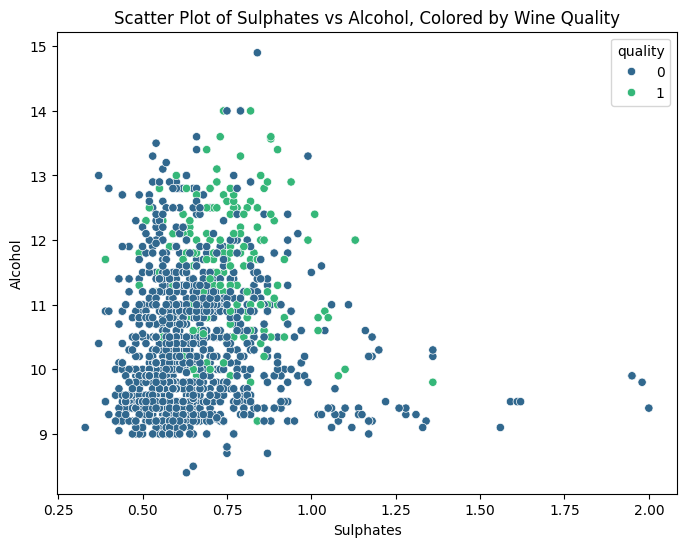

In [7]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='sulphates', y='alcohol', hue='quality', data=wine_dat, palette='viridis')
plt.xlabel('Sulphates')
plt.ylabel('Alcohol')
plt.title('Scatter Plot of Sulphates vs Alcohol, Colored by Wine Quality')
plt.show()


So, it ooks like high alcohol and medium sulfites yield high quality. Possibly this could be a joint effect. So let's include interactions of alcohol and sulphates, as well as an interraction of alcohol and sulphates squared---to tease out a "meadium sulfate" effect---as additional features:

In [8]:
wine_dat['volatile acidity squared'] = wine_dat['volatile acidity'] ** 2
wine_dat['sulphates squared'] = wine_dat['sulphates'] ** 2
wine_dat['sulphates cubed'] = wine_dat['sulphates'] ** 3
wine_dat['chlorides squared'] = wine_dat['chlorides'] ** 2
wine_dat['density squared'] = wine_dat['density'] ** 2
wine_dat['citric acid squared'] = wine_dat['citric acid'] ** 2
wine_dat['alcohol x sulphates'] = wine_dat['alcohol'] * wine_dat['sulphates']
wine_dat['alcohol x sulphates squared'] = wine_dat['alcohol'] * wine_dat['sulphates'] ** 2

Here is a look at our updated data:

In [9]:
wine_dat.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,volatile acidity squared,sulphates squared,sulphates cubed,chlorides squared,density squared,citric acid squared,alcohol x sulphates,alcohol x sulphates squared
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0,0.4900,0.3136,0.175616,0.005776,0.995605,0.0000,5.264,2.94784
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0,0.7744,0.4624,0.314432,0.009604,0.993610,0.0000,6.664,4.53152
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0,0.5776,0.4225,0.274625,0.008464,0.994009,0.0016,6.370,4.14050
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0,0.0784,0.3364,0.195112,0.005625,0.996004,0.3136,5.684,3.29672
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0,0.4900,0.3136,0.175616,0.005776,0.995605,0.0000,5.264,2.94784


We could do even more exploring here---for instance, we could look at other interactions. So, think about this example not as exhaustive but more as suggestive. I hope you will spend some more time and thoughts than I did on your project.

## Preparing the Data for Predictive Modeling

Let's prepare the model for our predictive modeling process. I will split the data into a training set of 75% of the data, and a hold-out/test sample consisting of (random) 25% of the data. I will build different models based on the training set and use the test set to compare the models. Recall thar you want to set your random seed so that the code is reproducible:

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
np.random.seed(42)
train_data, test_data = train_test_split(wine_dat, test_size=0.25)

## First Model: Logoitic Regression with all Features

Let's start by running a baseline logistic regression model that includes all features (it may be possible to also run a logistic regression without our engineered features as a baseline).

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
import statsmodels.api as sm

In [13]:

X_train = train_data.drop('quality', axis=1)
y_train = train_data['quality']
X_test = test_data.drop('quality', axis=1)
y_test = test_data['quality']

model = LogisticRegression(penalty=None, max_iter=30000)  #Sklearn does a default penalty, but we want "straight logistic regression"; also uppinhg the iterations.
model.fit(X_train, y_train)

LogisticRegression(max_iter=30000, penalty=None)

Let's also run it via statsmodels, to see the coefficients in a more appealing manner:

In [14]:
X_train_sm = sm.add_constant(X_train)  # Add a constant for the intercept term
model_sm = sm.Logit(y_train, X_train_sm)
result_sm = model_sm.fit(maxiter=30000)  # Increase maxiter if needed
print(result_sm.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))


         Current function value: inf
         Iterations: 30000
                           Logit Regression Results                           
Dep. Variable:                quality   No. Observations:                 1199
Model:                          Logit   Df Residuals:                     1179
Method:                           MLE   Df Model:                           19
Date:                Sat, 07 Sep 2024   Pseudo R-squ.:                    -inf
Time:                        06:31:06   Log-Likelihood:                   -inf
converged:                      False   LL-Null:                       -478.49
Covariance Type:            nonrobust   LLR p-value:                     1.000
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                        4.222e+07   1.62e+07      2.606      0.009    1.05e+07     7.4e+07
fixed acidity   

/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/discrete_model.py:2443: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q * linpred)))
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))


So, it appears we have some convergence issues---but based on the results above, it seems that our engineered features seem meaningful. Potentially there is scope for even more feature engineering, as discussed above.

Let's check the performance of the model by looking at the confusion matrix and some metrics based on a 50% threshold in the test set:

In [15]:
X_test = test_data.drop('quality', axis=1)
y_test = test_data['quality']
y_pred = model.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)

print(conf_matrix) #Carefull: TN and FN are on the first vertical!

misclassification_rate = (conf_matrix[0, 1] + conf_matrix[1, 0]) / np.sum(conf_matrix)
fp_rate = conf_matrix[0, 1] / (conf_matrix[1, 1] + conf_matrix[0, 1])
fn_rate = conf_matrix[1, 0] / (conf_matrix[1, 0] + conf_matrix[0, 0])

print(f"Misclassification Rate: {misclassification_rate:.4f}")
print(f"False Positive Rate: {fp_rate:.4f}")
print(f"False Negative Rate: {fn_rate:.4f}")

[[332  15]
 [ 36  17]]
Misclassification Rate: 0.1275
False Positive Rate: 0.4688
False Negative Rate: 0.0978


Let's also look at the ROC curve, and the associated AUC, in the test set:

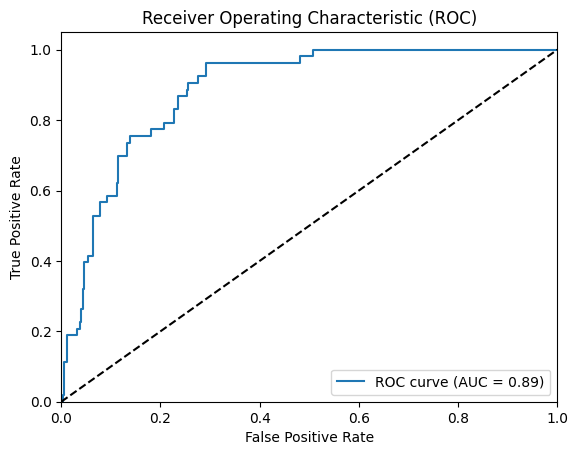

In [16]:
y_pred_proba = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba) # Calculate ROC curve
auc = roc_auc_score(y_test, y_pred_proba) # Calculate AUC

plt.figure() # Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

So, we obtain a decent AUC. We have quite a few false positives, however. So arguably a higher threshold for being more confident that a wine that is identified as high-quality actually is high-quality is advisable:

In [33]:
conf_matrix_mod = confusion_matrix(y_test, (y_pred_proba > 0.6))

print(conf_matrix)

[[343   4]
 [ 43  10]]


So 10 out of the 14 predicted positives are actually high quality wines!

## Improved Model: Logistic Lasso


Let's now check if we can improve on our "[kitchen sink regression](https://en.wikipedia.org/wiki/Kitchen_sink_regression)". We can consider different approaches, e.g. forward selection, backward selectiob, ridge regression---or the LASSO that does shrinkage and selection. I am opting for the LASSO here, although of course we can also consider a few different model options.

In running the LASSO, I pick the penalty parameter based on cross validation. Only then, when comparing the LASSO model to our logistic regression above, will I be using the test set. In order to apply LASSO, scale the data features

In [26]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegressionCV

In [27]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [28]:
# L1 regularization with cross-validation
model_l1 = LogisticRegressionCV(cv=5, penalty='l1', solver='liblinear', max_iter=30000)
model_l1.fit(X_train_scaled, y_train)

# Print best C value (inverse of regularization strength)
print("Best C:", model_l1.C_)
print("Coefficients:\n", model_l1.coef_)

Best C: [21.5443469]
Coefficients:
 [[ 0.24843645 -1.28709715 -0.85007737  0.31599159 -0.51918971  0.
  -0.44411476 -0.45114079 -0.24234015  2.1207522   0.56092428  0.86820673
   0.         -2.52879228  0.34514603 -0.01540365  0.77252172  0.90475991
  -0.90606448]]


In [29]:
zero_coef_features = X_train.columns[model_l1.coef_[0] == 0]
print("Features with zero coefficients:", zero_coef_features)

Features with zero coefficients: Index(['free sulfur dioxide', 'sulphates squared'], dtype='object')


So, it looks like that the LASSO selected out two features: free sulfur dioxide and our designed sulphate squared features.

Let's check the predictions in the test set:

In [30]:
y_pred_l1 = model_l1.predict(X_test_scaled)
conf_matrix_l1 = confusion_matrix(y_test, y_pred_l1)
print("Confusion Matrix (L1):\n", conf_matrix_l1)

misclassification_rate_l1 = (conf_matrix_l1[0, 1] + conf_matrix_l1[1, 0]) / np.sum(conf_matrix_l1)
fp_rate_l1 = conf_matrix_l1[0, 1] / (conf_matrix_l1[1, 1] + conf_matrix_l1[0, 1])
fn_rate_l1 = conf_matrix_l1[1, 0] / (conf_matrix_l1[1, 0] + conf_matrix_l1[0, 0])

print(f"Misclassification Rate: {misclassification_rate_l1:.4f}")
print(f"False Positive Rate: {fp_rate_l1:.4f}")
print(f"False Negative Rate: {fn_rate_l1:.4f}")

Confusion Matrix (L1):
 [[335  12]
 [ 39  14]]
Misclassification Rate: 0.1275
False Positive Rate: 0.4615
False Negative Rate: 0.1043


So the misclassification rate is identical---although the model is simpler! So this model seems to be an improvement. Let's look at the AUC:

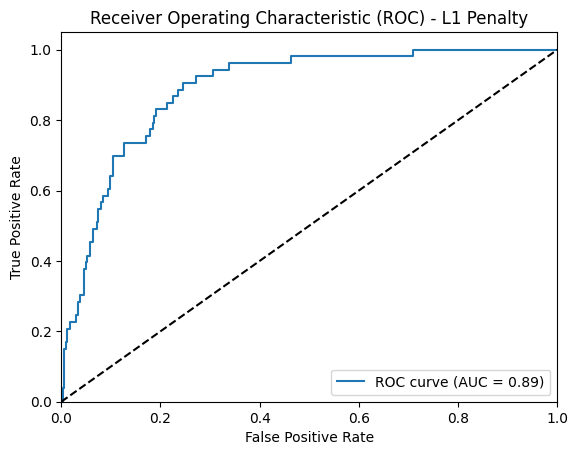

In [31]:
# ROC and AUC
y_pred_proba_l1 = model_l1.predict_proba(X_test_scaled)[:, 1]
fpr_l1, tpr_l1, _ = roc_curve(y_test, y_pred_proba_l1)
auc_l1 = roc_auc_score(y_test, y_pred_proba_l1)

# Plot ROC curve
plt.figure()
plt.plot(fpr_l1, tpr_l1, label='ROC curve (AUC = {:.2f})'.format(auc_l1))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - L1 Penalty')
plt.legend(loc="lower right")
plt.show()

The AUC is the same as above. Still, similar or slighly improved performance although the model is simpler is good!

In [34]:
conf_matrix_l1_mod = confusion_matrix(y_test, (y_pred_proba_l1 > 0.6))
print(conf_matrix_l1_mod)

[[343   4]
 [ 42  11]]


This one is clearly better!

## Re-run the model on the Full Data

Before we use the model, let's rerun our final model based on the entire dataset---so that we leverage all the data:

In [35]:
X = wine_dat.drop('quality', axis=1)
y = wine_dat['quality']
X_scaled = scaler.fit_transform(X)

In [37]:
# Use the best C from L1 regularization
best_C = model_l1.C_[0]

# Fit Lasso model on the entire dataset
model_lasso = LogisticRegression(penalty='l1', C=best_C, solver='liblinear', max_iter=30000)
model_lasso.fit(X_scaled,y)

# Print coefficients
print("Coefficients:\n", model_lasso.coef_)

Coefficients:
 [[ 0.34753519 -1.10787628 -0.52271049  0.35068685 -0.54455268 -0.00669448
  -0.39523288  0.         -0.20530169  1.77694098  0.          0.74884056
  -2.78361359  1.75768119  0.27451946 -0.54739598  0.5161571   3.30758506
  -3.08886279]]


So some of the coefficients moved a little.

Let's look at the in-sample fit of our full model

In-sample Confusion Matrix (Lasso):
 [[1339   43]
 [ 134   83]]


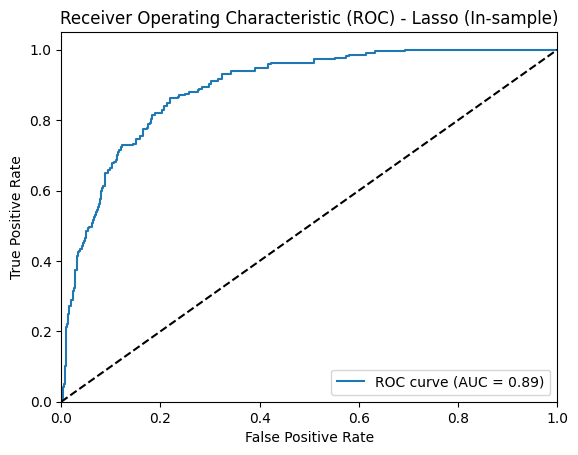

In [38]:
y_pred_lasso = model_lasso.predict(X_scaled)

conf_matrix_lasso = confusion_matrix(y, y_pred_lasso)
print("In-sample Confusion Matrix (Lasso):\n", conf_matrix_lasso)

y_pred_proba_lasso = model_lasso.predict_proba(X_scaled)[:, 1]
fpr_lasso, tpr_lasso, _ = roc_curve(y, y_pred_proba_lasso)
auc_lasso = roc_auc_score(y, y_pred_proba_lasso)

plt.figure()
plt.plot(fpr_lasso, tpr_lasso, label='ROC curve (AUC = {:.2f})'.format(auc_lasso))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Lasso (In-sample)')
plt.legend(loc="lower right")
plt.show()


The misclassification rate is:

In [39]:
(43+134)/(1339+43+134+83)

0.11069418386491557

This is the model I would use for generating final predictions!